In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#CRIAR UM PANDA DATA FRAME
import pandas as pd
from collections import OrderedDict
import pickle

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
def salvaDataFrames_csv(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_csv(caminhoSaida+'\/'+nomeArquivo, sep=',', encoding = 'utf-8')
       
def salvaDataFrames_pkl(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_pickle(caminhoSaida+'\/'+nomeArquivo, compression='infer')
    
caminhoDataframe = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/DataFrames\/' 

def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

dataFrame_SN = abreDataFrame(caminhoDataframe, 'Data_Frame_Ia_PCA_II.pkl')
dataFrame_SN.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_Px_1,PCA_Px_2,PCA_Py_1,PCA_Py_2,PCA_Vx_1,PCA_Vx_2,PCA_Vy_1,PCA_Vy_2
0,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980319.flm,"[0.5984432965698894, 0.5905492293635906, 0.579...",Ia,-1.890,Maximo,-6458.880203,-655.708442,-0.444330,0.048064,-6280.719189,-396.874182,-0.241119,0.373996
1,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980320.flm,"[0.637192333491651, 0.6141274942884631, 0.5960...",Ia,-1.890,Maximo,-2137.843934,3937.730133,-0.275439,0.112216,1117.916273,4786.035451,-0.069201,0.484576
2,"[3657.8171091445433, 3661.546502254467, 3665.2...",SN_Redshifted_sn1998V-19980321.flm,"[0.6570335303026084, 0.6753503669909301, 0.673...",Ia,-0.956,Maximo,-4579.883496,2143.853840,-0.423004,0.239782,-4128.202144,2893.456010,-0.306284,0.584218
3,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980914.flm,"[0.9510331445835957, 0.8747050414260726, 0.822...",Ia,-0.435,Maximo,3484.079226,4660.968715,-0.412396,0.413321,3706.066803,4403.288461,-0.213103,0.403622
4,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980915.flm,"[0.9336562914191868, 0.8202276475798798, 0.749...",Ia,-0.435,Maximo,3294.567153,4491.130143,-0.331301,0.292613,6098.139925,2879.216191,-0.138856,0.308748


In [3]:
def machine_learning_tag(dataframe):
    
    nome_valor = []
    print(dataframe.loc[0,'Tag_Fase'])
    for i in range(len(dataframe.index)):
        if(dataframe.loc[i,'Tag_Fase'] == 'Inicial'):
            valor = 1
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pre_Maximo' ):
            valor = 2
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Maximo'):
            valor = 3
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pos_Maximo'):
            valor = 4
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pre_Nebular' ):
            valor = 5
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Nebular' ):
            valor = 6
            nome_valor.append(valor)
        else:
            nome_valor.append(0)
                
    dataframe['Tag_valor'] = nome_valor     
    
    return nome_valor

In [10]:
X = dataFrame_SN[['PCA_Px_1','PCA_Px_2','PCA_Py_1','PCA_Py_2','PCA_Vx_1','PCA_Vx_2','PCA_Vy_1','PCA_Vy_2']]

X = StandardScaler().fit_transform(X)
#labels
y = machine_learning_tag(dataframe=dataFrame_SN)

Maximo


In [11]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 6
Homogeneity: 0.005
Completeness: 0.037
V-measure: 0.008
Adjusted Rand Index: -0.000
Adjusted Mutual Information: 0.001
Silhouette Coefficient: -0.373


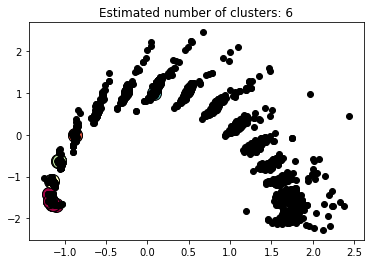

In [12]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [4]:
dataFrame_PCA_XY = abreDataFrame(caminhoDataframe, 'Data_Frame_Ia_PCA_XY.pkl')
dataFrame_PCA_XY.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_SNx_1,PCA_SNx_2,PCA_SNx_3,PCA_SNx_4,PCA_SNy_1,PCA_SNy_2,PCA_SNy_3,PCA_SNy_4
0,SN_Redshifted_sn1998V-19980319.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.407957e-10,8.094121e-13,-3.989887,-1.327662,-1.906058,1.198017
1,SN_Redshifted_sn1998V-19980320.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.468985e-10,-7.022874e-13,-4.102365,-1.263241,-1.900481,1.228636
2,SN_Redshifted_sn1998V-19980321.flm,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",-0.956,Ia,Maximo,503.000753,1591.195877,7.455253e-10,-6.996419e-13,-3.939491,-1.560221,-2.191264,0.987668
3,SN_Redshifted_sn1998dx-19980914.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.447813e-10,-2.083404e-13,-4.463030,-1.872636,1.136015,0.552185
4,SN_Redshifted_sn1998dx-19980915.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.447813e-10,-2.083404e-13,-3.999763,-0.583957,1.597298,0.534887


In [5]:
X1 = dataFrame_PCA_XY[['PCA_SNx_1','PCA_SNx_2','PCA_SNy_1','PCA_SNy_2']]

X1 = StandardScaler().fit_transform(X1)
#labels
y1 = machine_learning_tag(dataframe=dataFrame_PCA_XY)#dataFrame_PCA_XY[['Tag_Fase']]


Maximo


In [6]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y1, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y1, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y1, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y1, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y1, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X1, labels))

[ 0  0  0 ...  0 -1 -1]
Estimated number of clusters: 8
Homogeneity: 0.009
Completeness: 0.010
V-measure: 0.009
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.004
Silhouette Coefficient: -0.089


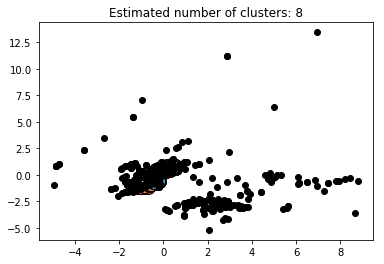

In [8]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
plt.figure()
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()